# Proyecto Individual - Machine Learning

## Accesos ##

In [1]:
import os

os.getcwd()

'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\ML_project\\src'

In [2]:
rooth_path = os.path.dirname(os.getcwd())
rooth_path

'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\ML_project'

In [3]:
import sys

sys.path.append(rooth_path)
sys.path = list(set(sys.path)) # Para evitar duplicados
sys.path

['',
 'C:\\Program Files\\Python38\\python38.zip',
 'C:\\Users\\maria\\.ipython',
 'C:\\Program Files\\Python38\\lib\\site-packages\\Pythonwin',
 'C:\\Program Files\\Python38\\lib\\site-packages\\IPython\\extensions',
 'c:\\Users\\maria\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.619093157\\pythonFiles\\lib\\python',
 'C:\\Program Files\\Python38\\lib\\site-packages\\win32',
 'C:\\Program Files\\Python38',
 'C:\\Program Files\\Python38\\lib',
 'c:\\Users\\maria\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.619093157\\pythonFiles\\vscode_datascience_helpers\\..\\.does-not-exist',
 'C:\\Program Files\\Python38\\lib\\site-packages',
 'c:\\Users\\maria\\.vscode\\extensions\\ms-toolsai.jupyter-2021.3.619093157\\pythonFiles',
 'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio_Code\\Python\\ML_project',
 'C:\\Program Files\\Python38\\DLLs',
 'C:\\Program Files\\Python38\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\maria\\OneDrive\\Escritorio\\The_Bridge\\Visual_Studio

## Librerías ##

In [4]:
# Importaciones de utils
from utils.visualization_tb import cm_to_inch, histogram_figure, piechart_figure, diagramalinea_figure, correlation_matrix
from utils.models import regression_results, encode_OneHot

# Importaciones de data cleaning y data visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Importaciones de ML
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Modelos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

# Guardar modelos
from pickle import dump

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Lectura de csv Videogames

In [5]:
df_videogames = pd.read_csv("../data/vgsalesGlobale.csv", sep=",")
pd.set_option('display.max_columns', None)
df_videogames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Valores Null

In [6]:
# Comprueba si hay valores null
check_for_nan2 = df_videogames.isnull().values.any()

print (check_for_nan2)

True


In [7]:
# Cuantos valores hay
total_nan_values2 = df_videogames.isnull().sum().sum()
print (total_nan_values2)

329


In [8]:
# Se hace un for para iterar sobre las columnas y comprobar en qué columna hay valores null
for valor in df_videogames.columns:
    print(valor, df_videogames[valor].isnull().values.any())
# Solo hay null en la columna de Year y en Publisher

Rank False
Name False
Platform False
Year True
Genre False
Publisher True
NA_Sales False
EU_Sales False
JP_Sales False
Other_Sales False
Global_Sales False


In [9]:
# 329 en una base de datos de 16k es un 1.98% de los datos
round(329 / 16598 * 100, 2)
# Se descarta completar los datos dado que el porcentaje de datos null es mínimo

1.98

## Duplicados

In [10]:
# Se comprueba si hay duplicados
duplicate_rows2 = df_videogames[df_videogames.duplicated()]
duplicate_rows2

# No hay duplicados

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


## Limpiar datos

In [11]:
# El dataset es hasta 2017 y hay un dato que es en 2020, es necesario cambiarlo por su dato real
df_videogames[df_videogames['Year']==2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [12]:
df_videogames.iloc[5957, df_videogames.columns.get_loc('Year')] = 2006

In [13]:
# Se comprueba de nuevo si hay algún juego en 2020
df_videogames[df_videogames['Year']==2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


## ¿Cuál es el videojuego más vendido?

In [14]:
# El dataset tiene una columna de Ranking de ventas, filtramos por el número 1
df_videogames[df_videogames['Rank']==1]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


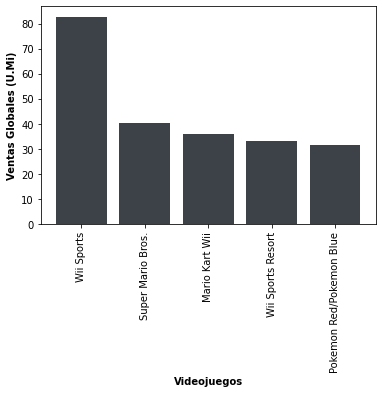

In [15]:
histogram_figure(x=df_videogames.Name.head(5).values, y=df_videogames.Global_Sales.head(5).values, x_label= "Videojuegos", y_label="Ventas Globales (U.Mi)", rooth_path=rooth_path, name_fig="\\Videojuegos_más_vendidos")

## ¿Y el que menos?

In [16]:
df_videogames[df_videogames['Rank']==16600 ]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01


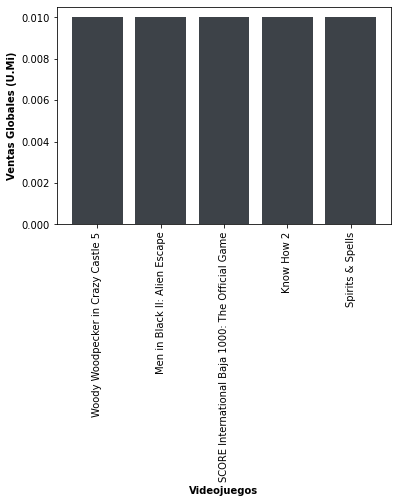

In [17]:
histogram_figure(x=df_videogames.Name.tail(5).values, y=df_videogames.Global_Sales.tail(5).values, x_label= "Videojuegos", y_label="Ventas Globales (U.Mi)", rooth_path=rooth_path, name_fig="\\Videojuegos_menos_vendidos")

## ¿Qué Plataforma de videojuegos ha vendido más juegos hasta 2016? ¿Y la que menos?

In [18]:
df_platform = df_videogames.groupby("Platform").sum("Global_Sales").sort_values(by="Global_Sales", ascending= False)
df_platform.head()
#La Plataforma que más juegos ha vendido es Play Station 2 y la que menos es PC-FX

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
PS2,16159167,4263750.0,583.84,339.29,139.20,193.44,1255.64
X360,8466048,2482205.0,601.05,280.58,12.43,85.54,979.96
PS3,9027970,2622109.0,392.26,343.71,79.99,141.93,957.84
Wii,10243276,2591562.0,507.71,268.38,69.35,80.61,926.71
DS,20845831,4283479.0,390.71,194.65,175.57,60.53,822.49


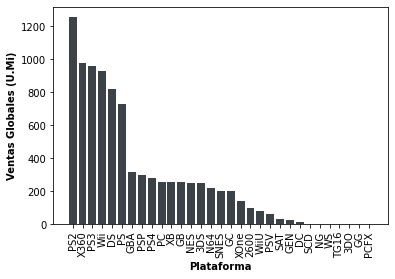

In [19]:
histogram_figure(x=df_platform.index, y=df_platform.Global_Sales, x_label= "Plataforma", y_label="Ventas Globales (U.Mi)", rooth_path=rooth_path, name_fig="\\Plataforma_más_vendida.png")

In [20]:
# Se suman las ventas globales para posteriomente calcular el porcentaje sobre el 100% de las ventas
Total_sum = df_videogames.Global_Sales.sum()
Total_sum

8920.44

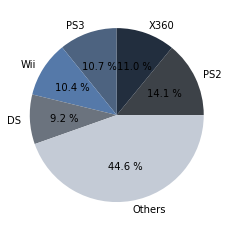

In [21]:
# Pie Chart sobre los 5 primeros para ver el porcentaje de mercado que abarcan
# Creación de la figura
PS2 = 1255.64
X360 = 979.96
PS3 = 957.84
Wii = 926.71
DS = 822.49
Others = Total_sum - PS2 - X360 - PS3 - Wii - DS

labels = ["PS2", "X360", "PS3", "Wii", "DS", "Others"]

piechart_figure(x1=PS2, x2=X360, x3=PS3, x4=Wii, x5=DS, x6=Others, labels=labels, rooth_path=rooth_path, name_fig="\Piechart_5Plataformas_más_vendidas.png" )

## ¿Qué genero de juego tiene más aceptación?

In [22]:
df_genre = df_videogames.groupby("Genre").sum("Global_Sales").sort_values(by="Global_Sales", ascending= False)
df_genre.head()
#Los videojuegos de acción son los que más aceptación tienen y los de estrategia los que menos.

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37


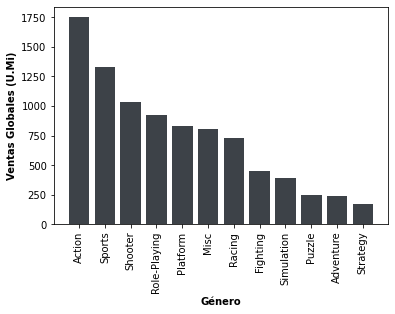

In [23]:
histogram_figure(x=df_genre.index, y=df_genre.Global_Sales, x_label= "Género", y_label="Ventas Globales (U.Mi)", rooth_path=rooth_path, name_fig="\\Genero_más_vendido.png")


## ¿El juego más vendido en Norte América es el mismo que en la Unión Europea?

In [24]:
df_na_Sales= df_videogames.sort_values("NA_Sales", ascending=False)
df_na_Sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


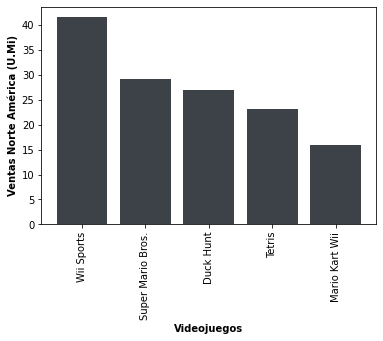

In [25]:
histogram_figure(x=df_na_Sales.Name.head(5), y=df_na_Sales.NA_Sales.head(5), x_label= "Videojuegos", y_label="Ventas Norte América (U.Mi)", rooth_path=rooth_path, name_fig="\\NAsales_más_vendido.png")

In [26]:
df_eu_Sales = df_videogames.sort_values("EU_Sales", ascending=False)
df_eu_Sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


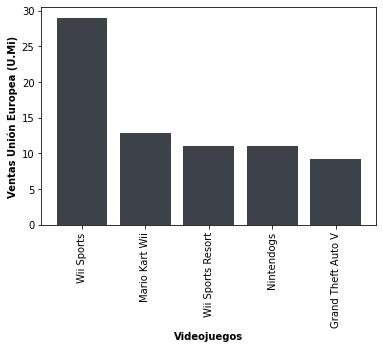

In [27]:
histogram_figure(x=df_eu_Sales.Name.head(5), y=df_eu_Sales.EU_Sales.head(5), x_label= "Videojuegos", y_label="Ventas Unión Europea (U.Mi)", rooth_path=rooth_path, name_fig="\\EUsales_más_vendido.png")

In [28]:
# El primer videojuego coincide pero los siguientes son distintos

## ¿Cómo es la evolución por año?

In [29]:
df_year = df_videogames.groupby("Year").sum("Global_Sales").sort_values("Year")
df_year.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.0,29826,10.59,0.67,0.00,0.12,11.38
1981.0,190488,33.40,1.96,0.00,0.32,35.77
1982.0,149186,26.92,1.65,0.00,0.31,28.86
1983.0,56759,7.76,0.80,8.10,0.14,16.79
1984.0,22911,33.28,2.10,14.27,0.70,50.36


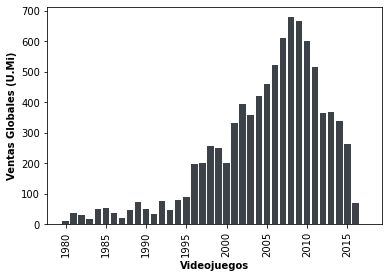

In [30]:
histogram_figure(x=df_year.index, y=df_year.Global_Sales, x_label= "Videojuegos", y_label="Ventas Globales (U.Mi)", rooth_path=rooth_path, name_fig="\\Evolución_por_año.png")

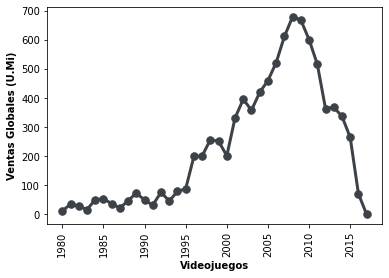

In [31]:
diagramalinea_figure(x=df_year.index.values, y=df_year.Global_Sales, x_label= "Videojuegos", y_label="Ventas Globales (U.Mi)", rooth_path=rooth_path, name_fig="\\Evolución_por_año.png")

## Matriz de correlación del dataset de Videogames

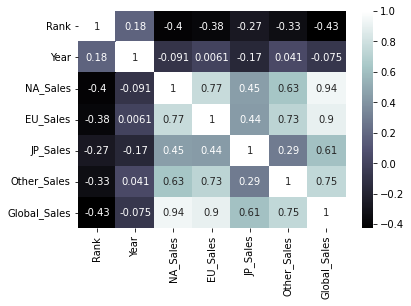

In [32]:
correlation_matrix(df_videogames)

In [33]:
# Se guarda la figura
name_fig = "\Correlación_videogames.png"
carpeta_reports = "\\reports"

plt.savefig(rooth_path + carpeta_reports + name_fig, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Piechart tiempo empleado

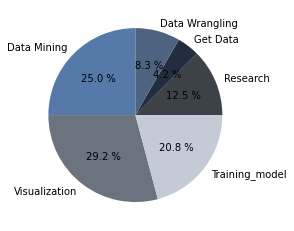

In [34]:
Research = 15
Get_Data = 5
Data_Wrangling = 10
Data_Mining = 30
Visualization = 35
Training_model = 25

labels = ["Research", "Get Data", "Data Wrangling", "Data Mining","Visualization", "Training_model"]

piechart_figure(x1=Research, x2=Get_Data, x3=Data_Wrangling, x4=Data_Mining, x5=Visualization, x6=Training_model, labels=labels, rooth_path=rooth_path, name_fig="\Piechart_time.png" )

# MACHINE LEARNING

In [35]:
df_videogames

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [36]:
df_PRUEBA = df_videogames.copy()

In [37]:
lista_recorrer = list(df_PRUEBA.Genre.unique())

In [38]:
lista_recorrer3 = list(df_PRUEBA.Platform.unique())

In [39]:
lista_recorrer2 = list(df_PRUEBA.Publisher.unique())

In [40]:
# for i in lista_recorrer:
#     df_PRUEBA[i] = 0

In [41]:
# for pos, val in enumerate(df_PRUEBA["Genre"]):
#     if val in lista_recorrer:
#         df_PRUEBA[val][pos] = 1

## Get Dummies

### Hacemos get dummies y creamos un json por cada dummie

In [42]:
df_videogames.columns = df_videogames.columns.str.replace(' ', '_')

In [43]:
df_videogames = encode_OneHot(df_videogames, "Platform")
df_videogames.columns = df_videogames.columns.str.replace(' ', '_')
print(df_videogames.shape)

(16598, 41)


In [44]:
diction_Platform = {}

array_col = df_videogames.loc[:, "2600":"XOne"].columns.values
for i,col in enumerate(array_col):
    empty= np.zeros(len(array_col))
    empty[i] = 1
    diction_Platform[col] = [int(e) for e in list(empty)]

with open("../data/dicc_Platform.json", "w") as fp:
    json.dump(diction_Platform,fp)

In [45]:
df_videogames = encode_OneHot(df_videogames, "Genre")
df_videogames.columns = df_videogames.columns.str.replace(' ', '_')
print(df_videogames.shape)

(16598, 52)


In [46]:
diction_Genre = {}

array_col = df_videogames.loc[:, "Action":"Strategy"].columns.values
for i,col in enumerate(array_col):
    empty= np.zeros(len(array_col))
    empty[i] = 1
    diction_Genre[col] = [int(e) for e in list(empty)]

with open("../data/dicc_Genre.json", "w") as fp:
    json.dump(diction_Genre,fp)

In [47]:
df_videogames = encode_OneHot(df_videogames, "Publisher")
df_videogames.columns = df_videogames.columns.str.replace(' ', '_')
print(df_videogames.shape)

(16598, 629)


In [48]:
diction_Publisher = {}

array_col = df_videogames.loc[:, "10TACLE_Studios":"responDESIGN"].columns.values
for i,col in enumerate(array_col):
    empty= np.zeros(len(array_col))
    empty[i] = 1
    diction_Publisher[col] = [int(e) for e in list(empty)]

with open("../data/dicc_Publisher.json", "w") as fp:
    json.dump(diction_Publisher,fp)

In [49]:
"""
dicc = {}
for pos,val in enumerate (df_PRUEBA["Publisher"]):
    dicc[val] = df_videogames.loc[pos, "10TACLE Studios":"responDESIGN"].values

df_dicc_publisher = pd.DataFrame(dicc)
json_publisher = df_dicc_publisher.to_json()

with open("dicc_Publisher.json", "w") as fp:
    json.dump(json_publisher,fp) 
"""

'\ndicc = {}\nfor pos,val in enumerate (df_PRUEBA["Publisher"]):\n    dicc[val] = df_videogames.loc[pos, "10TACLE Studios":"responDESIGN"].values\n\ndf_dicc_publisher = pd.DataFrame(dicc)\njson_publisher = df_dicc_publisher.to_json()\n\nwith open("dicc_Publisher.json", "w") as fp:\n    json.dump(json_publisher,fp) \n'

## Enconding

In [50]:
# le = preprocessing.LabelEncoder()

# cat_col = ['Platform', "Genre", 'Publisher']
# for i in cat_col:
#     df_videogames[i] = le.fit_transform(df_videogames[i])

## Definiendo x e y

In [118]:
X = np.array(df_videogames[df_videogames.columns.difference(['Global_Sales',  "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Name", "Rank", "Year"])])
y = np.array(df_videogames[["Global_Sales"]])

print(X.shape)
print(y.shape)

(16598, 621)
(16598, 1)


In [83]:
np.savetxt("../data/Entrenamiento_pca.csv", X, delimiter=",")

In [119]:
X.shape

(16598, 621)

In [127]:
arraymaria = np.zeros(621)
arraymaria[0] = 1
arraymaria[12] = 1
arraymaria[43] = 1
arraymaria = arraymaria.reshape(1,-1)

In [128]:
arraymaria.shape

(1, 621)

In [129]:
model_load = open("../data/Entrenamiento_pca.csv")
#model_load = open("ML_project\\data\\Entrenamiento_pca.csv")
numpy_array = np.loadtxt(model_load, delimiter=",")

# df = pd.read_csv("ML_project/src/to_submit.csv")

   # df = encode_OneHot(df, "Platform")
    # df = encode_OneHot(df, "Genre")
    # df = encode_OneHot(df, "Publisher")

df = arraymaria

to_pred = np.concatenate((numpy_array, df), axis=0)

#to_pred = to_pred.reshape(-1,1)

to_pred.shape

(16599, 621)

In [130]:
to_pred[-1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [115]:
from pickle import load

In [132]:
pca = PCA(n_components=3)

pca.fit(to_pred)
to_pred = pca.fit_transform(to_pred)

print("###################", to_pred.shape)
loaded_model = load(open("../data/finalized_model.sav", "rb"))

prediction = loaded_model.predict(to_pred)

# print("############################", type(prediction))
# prediction_json = json.dumps(data)
prediction[-1]

################### (16599, 3)


array([0.54750462])

In [133]:
prediction[-1][0]

0.5475046234361837

In [ ]:
data = {}
data['prediccion'] = prediction[-1][0]

## PCA

In [120]:
# Si se hace GET DUMMIES hacer PCA
pca = PCA(n_components=3)

pca.fit(X)
X = pca.fit_transform(X)

In [121]:
X.shape

(16598, 3)

In [91]:
X[0]

array([-0.48275756,  0.42261288,  0.59400105])

## Linear Regression

### Buscando la mejor random_state

In [55]:
lista_random_state = []
lista_mae = [] 

In [56]:
"""
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    print("----------------------------------------------------------------------------------------------------------------")
    print("ramdom state is:", i)
    print("----------------------------------------------------------------------------------------------------------------")
    
    model_lin = linear_model.LinearRegression(n_jobs=-1)

    model_lin.fit(X_train, y_train)

    y_pred = model_lin.predict(X_test)

    score_mae = regression_results(y_test, y_pred)
    
    lista_random_state.append(i)
    lista_mae.append(score_mae)

"""

'\nfor i in range(0,1000):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)\n    print("----------------------------------------------------------------------------------------------------------------")\n    print("ramdom state is:", i)\n    print("----------------------------------------------------------------------------------------------------------------")\n    \n    model_lin = linear_model.LinearRegression(n_jobs=-1)\n\n    model_lin.fit(X_train, y_train)\n\n    y_pred = model_lin.predict(X_test)\n\n    score_mae = regression_results(y_test, y_pred)\n    \n    lista_random_state.append(i)\n    lista_mae.append(score_mae)\n\n'

In [57]:
"""
submission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})
submission.sort_values("mae")
"""

'\nsubmission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})\nsubmission.sort_values("mae")\n'

### Entrenamos el modelo

In [122]:
model_lin = linear_model.LinearRegression(n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=591)
model_lin.fit(X_train, y_train)

y_pred = model_lin.predict(X_test)

score = model_lin.score(X_test,y_test)*100
print(score)

regression_results(y_test, y_pred)

-0.5324906302694554
MAE:  0.5299


0.5299

In [124]:
y_test

array([[0.65],
       [0.04],
       [0.16],
       ...,
       [0.01],
       [0.02],
       [0.7 ]])

In [125]:
y_pred[0]

array([0.59289964])

### Grid search del modelo para sacar su mejor versión

In [59]:
"""
pipe = Pipeline(steps=[('classifier', linear_model.LinearRegression())])

random_forest_params = {
    'classifier': [linear_model.LinearRegression()],
    'classifier__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=591)
clf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
"""

'\npipe = Pipeline(steps=[(\'classifier\', linear_model.LinearRegression())])\n\nrandom_forest_params = {\n    \'classifier\': [linear_model.LinearRegression()],\n    \'classifier__alpha\': [0.001, 0.01, 0.1, 1, 10, 100, 1000],\n    }\n\ncv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=591)\nclf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)\n\nbest_model = clf.fit(X_train, y_train)\n\n# View best model\nseparator = "\n############################\n"\nprint(separator)\nprint("best estimator:", best_model.best_estimator_.get_params()[\'classifier\'])\nprint(separator)\nprint("clf.best_params_", clf.best_params_)\nprint(separator)\n# Mean cross-validated score of the best_estimator\nprint("clf.best_score", clf.best_score_)\n'

## Random Forest Regressor

### Buscamos la mejor random_state para el modelo

In [60]:
lista_random_state = []
lista_mae = [] 

In [61]:
"""
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    print("----------------------------------------------------------------------------------------------------------------")
    print("ramdom state is:", i)
    print("----------------------------------------------------------------------------------------------------------------")
    
    model_forest = RandomForestRegressor(n_jobs=-1)

    model_forest.fit(X_train, y_train)
    
    y_pred = model_forest.predict(X_test)

    score_mae = regression_results(y_test, y_pred)
    
    lista_random_state.append(i)
    lista_mae.append(score_mae)
    print(score_mae)

"""

'\nfor i in range(0,1000):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)\n    print("----------------------------------------------------------------------------------------------------------------")\n    print("ramdom state is:", i)\n    print("----------------------------------------------------------------------------------------------------------------")\n    \n    model_forest = RandomForestRegressor(n_jobs=-1)\n\n    model_forest.fit(X_train, y_train)\n    \n    y_pred = model_forest.predict(X_test)\n\n    score_mae = regression_results(y_test, y_pred)\n    \n    lista_random_state.append(i)\n    lista_mae.append(score_mae)\n    print(score_mae)\n\n'

In [62]:
"""
submission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})
submission.sort_values("mae")
"""

'\nsubmission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})\nsubmission.sort_values("mae")\n'

### Entrenamos el modelo para hacer una prueba

In [63]:
"""
model_forest = RandomForestRegressor(n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=387)
model_forest.fit(X_train, y_train)

y_pred = model_forest.predict(X_test)

score_mae = regression_results(y_test, y_pred)
score_mae
"""

'\nmodel_forest = RandomForestRegressor(n_jobs=-1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=387)\nmodel_forest.fit(X_train, y_train)\n\ny_pred = model_forest.predict(X_test)\n\nscore_mae = regression_results(y_test, y_pred)\nscore_mae\n'

### Grid search del modelo para sacar su mejor versión

In [64]:
"""
pipe = Pipeline(steps=[('classifier', RandomForestRegressor())])

random_forest_params = {
    'classifier': [RandomForestRegressor()],
    'classifier__n_estimators': [10, 100, 1000],
    'classifier__max_features': [1, 2, 3]
    }

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=387)
clf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
"""

'\npipe = Pipeline(steps=[(\'classifier\', RandomForestRegressor())])\n\nrandom_forest_params = {\n    \'classifier\': [RandomForestRegressor()],\n    \'classifier__n_estimators\': [10, 100, 1000],\n    \'classifier__max_features\': [1, 2, 3]\n    }\n\ncv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=387)\nclf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)\n\nbest_model = clf.fit(X_train, y_train)\n\n# View best model\nseparator = "\n############################\n"\nprint(separator)\nprint("best estimator:", best_model.best_estimator_.get_params()[\'classifier\'])\nprint(separator)\nprint("clf.best_params_", clf.best_params_)\nprint(separator)\n# Mean cross-validated score of the best_estimator\nprint("clf.best_score", clf.best_score_)\n'

## SVR

### Buscamos la mejor random_state para el modelo

In [65]:
lista_random_state = []
lista_mae = [] 

In [66]:
"""
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    print("----------------------------------------------------------------------------------------------------------------")
    print("ramdom state is:", i)
    print("----------------------------------------------------------------------------------------------------------------")
    
    model_svr = SVR(kernel='linear')

    model_svr.fit(X_train, y_train)
    
    y_pred = model_svr.predict(X_test)

    score_mae = regression_results(y_test, y_pred)
    
    lista_random_state.append(i)
    lista_mae.append(score_mae)
"""

'\nfor i in range(0,1000):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)\n    print("----------------------------------------------------------------------------------------------------------------")\n    print("ramdom state is:", i)\n    print("----------------------------------------------------------------------------------------------------------------")\n    \n    model_svr = SVR(kernel=\'linear\')\n\n    model_svr.fit(X_train, y_train)\n    \n    y_pred = model_svr.predict(X_test)\n\n    score_mae = regression_results(y_test, y_pred)\n    \n    lista_random_state.append(i)\n    lista_mae.append(score_mae)\n'

In [67]:
"""
submission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})
submission.sort_values("mae")
"""

'\nsubmission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})\nsubmission.sort_values("mae")\n'

### Entrenamos el modelo

In [68]:
"""
model = SVR(kernel='linear')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=542)
model.fit(X_train, y_train)

y_pred = model_forest.predict(X_test)

score_mae = regression_results(y_test, y_pred)
score_mae
"""

"\nmodel = SVR(kernel='linear')\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=542)\nmodel.fit(X_train, y_train)\n\ny_pred = model_forest.predict(X_test)\n\nscore_mae = regression_results(y_test, y_pred)\nscore_mae\n"

### Grid search del modelo para sacar su mejor versión

In [69]:
"""
pipe = Pipeline(steps=[('classifier', SVR())])

random_forest_params = {
    'classifier': [SVR()],
    'classifier__kernel': ["linear", "sigmoid", "rbf", "poly"],
    'classifier__C': [1,5,10],
    'classifier__degree': [1,2,3,8],
    'classifier__degree': [0.01,10,0.5],
    'classifier__degree': ['auto','scale'],
    }

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=542)
clf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)

# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
"""

'\npipe = Pipeline(steps=[(\'classifier\', SVR())])\n\nrandom_forest_params = {\n    \'classifier\': [SVR()],\n    \'classifier__kernel\': ["linear", "sigmoid", "rbf", "poly"],\n    \'classifier__C\': [1,5,10],\n    \'classifier__degree\': [1,2,3,8],\n    \'classifier__degree\': [0.01,10,0.5],\n    \'classifier__degree\': [\'auto\',\'scale\'],\n    }\n\ncv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=542)\nclf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)\n\nbest_model = clf.fit(X_train, y_train)\n\n# View best model\nseparator = "\n############################\n"\nprint(separator)\nprint("best estimator:", best_model.best_estimator_.get_params()[\'classifier\'])\nprint(separator)\nprint("clf.best_params_", clf.best_params_)\nprint(separator)\n\n# Mean cross-validated score of the best_estimator\nprint("clf.best_score", clf.best_score_)\n'

## Polynomial Features

### Buscamos la mejor random_state para nuestro modelo

In [70]:
lista_random_state = []
lista_mae = [] 

In [71]:
"""
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    model = PolynomialFeatures(degree=12)
    X_poly = model.fit_transform(X_train, y_train)
    model_lin = LinearRegression()

    model_trained = model_lin.fit(X_poly, y_train)

    y_pred = model_lin.predict(X_poly)

    score_mae = regression_results(y_test, y_pred)
    
    lista_random_state.append(i)
    lista_mae.append(score_mae)
"""

'\nfor i in range(0,1000):\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)\n\n    model = PolynomialFeatures(degree=12)\n    X_poly = model.fit_transform(X_train, y_train)\n    model_lin = LinearRegression()\n\n    model_trained = model_lin.fit(X_poly, y_train)\n\n    y_pred = model_lin.predict(X_poly)\n\n    score_mae = regression_results(y_test, y_pred)\n    \n    lista_random_state.append(i)\n    lista_mae.append(score_mae)\n'

In [72]:
"""
submission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})
submission.sort_values("mae")
"""

'\nsubmission = pd.DataFrame({"random": lista_random_state, "mae": lista_mae})\nsubmission.sort_values("mae")\n'

### Entrenamos el modelo

In [73]:
"""
model_poly = PolynomialFeatures(degree=12)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=542)

X_poly = model_poly.fit_transform(X_train, y_train)
model_lin2 = LinearRegression()

model_trained_poly = model_lin2.fit(X_poly, y_train)

y_pred = model_lin.predict(X_poly)

score_mae = regression_results(y_test, y_pred)
score_mae
"""

'\nmodel_poly = PolynomialFeatures(degree=12)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=542)\n\nX_poly = model_poly.fit_transform(X_train, y_train)\nmodel_lin2 = LinearRegression()\n\nmodel_trained_poly = model_lin2.fit(X_poly, y_train)\n\ny_pred = model_lin.predict(X_poly)\n\nscore_mae = regression_results(y_test, y_pred)\nscore_mae\n'

### Grid search del modelo para sacar su mejor versión

In [74]:
"""
pipe = Pipeline(steps=[('classifier', RandomForestRegressor())])

random_forest_params = {
    'classifier': [RandomForestRegressor()],
    'classifier__n_estimators': [10, 100, 1000],
    'classifier__max_features': [1, 2, 3]
    }

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=542)
clf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
"""

'\npipe = Pipeline(steps=[(\'classifier\', RandomForestRegressor())])\n\nrandom_forest_params = {\n    \'classifier\': [RandomForestRegressor()],\n    \'classifier__n_estimators\': [10, 100, 1000],\n    \'classifier__max_features\': [1, 2, 3]\n    }\n\ncv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=542)\nclf = GridSearchCV(estimator=pipe, param_grid=random_forest_params, cv=cv, verbose=0, n_jobs=-1)\n\nbest_model = clf.fit(X_train, y_train)\n\n# View best model\nseparator = "\n############################\n"\nprint(separator)\nprint("best estimator:", best_model.best_estimator_.get_params()[\'classifier\'])\nprint(separator)\nprint("clf.best_params_", clf.best_params_)\nprint(separator)\n# Mean cross-validated score of the best_estimator\nprint("clf.best_score", clf.best_score_)\n'

## Example Predictions

In [75]:
X_new = pd.DataFrame({'Platform': ["Wii", "GB"], 'Genre': ["Sports", "Racing"], 'Publisher': ["Nintendo", "Infogrames"]})
X_new.to_csv("to_submit.csv")

In [76]:
"""
predictions = model_lin.predict(X_new)
print(predictions)
"""

'\npredictions = model_lin.predict(X_new)\nprint(predictions)\n'

## Guardamos el modelo

In [79]:
filename = '../data/finalized_model.sav'
dump(model_lin, open(filename, 'wb'))